In [10]:
import random
import numpy as np
from matplotlib import pyplot as plt
import time
from scipy.stats import norm
from scipy.stats import t

%matplotlib inline


In [83]:
def drawPlot(elapsed_time, samples1, samples2 = None):
    x = [i for i in range(1, len(samples1) + 1)]

    plt.plot(x, samples1, color = 'blue')
    plt.xlabel("The number of iterations")
    plt.ylabel("The true value")
    plt.title("--- The time elapsed is %.5s seconds with variance %.5s  ---" % (elapsed_time, np.var(samples1)))
    if (samples2):
        plt.figure(0)
        plt.plot(x, samples2, color = 'red')
        plt.xlabel("The number of iterations")
        plt.ylabel("The true value")
        plt.title("--- The time elapsed is %.5s seconds with variance %.5s  ---" % (elapsed_time, np.var(samples2)))
    plt.show()
    

In [84]:
def showPlotTimeVariance(samplingMethod, num_iter, num_rep):
    start_time = time.time()
    currentSample1, currentSample2 = samplingMethod(num_iter, num_rep)
    finished_time = time.time()
    elapsed_time = finished_time - start_time

    drawPlot(elapsed_time, currentSample1, currentSample2)
    
    

In [85]:
f = lambda x: abs(x)
def simpleMC(num_iter, num_rep):
    samples = [0]*num_iter
    for i in range(num_iter):
        data = np.random.standard_t(3, num_rep)
        samples[i] = np.mean(f(data))
    return samples, None       

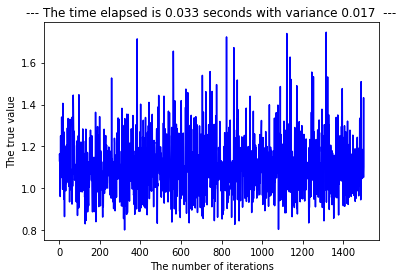

In [86]:
showPlotTimeVariance(simpleMC, 1500, 100)


In [78]:
f = lambda x: abs(x) # test function
pai = lambda x: t.pdf(x, 3)     # correct distribution
q = lambda x: t.pdf(x, 1)    # proposed distribution
w = lambda x: pai(x)/q(x)    # weight function

def importanceSampling1(num_iter, num_rep):
    standard_samples, normalized_samples = [0]*num_iter, [0]*num_iter
    for i in range(num_iter):
        data = np.random.standard_t(1, num_rep)
        weights = w(data)
        standard_samples[i] = np.mean(f(data)*weights)
        normalized_samples[i] = sum(f(data)*weights)/sum(weights)
        
    return standard_samples, normalized_samples     
    

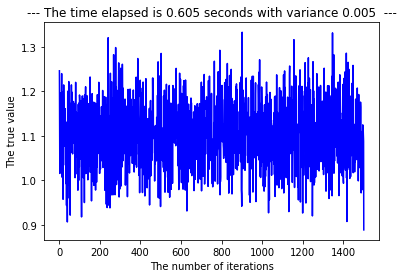

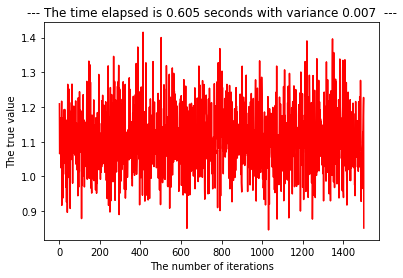

In [87]:
showPlotTimeVariance(importanceSampling1, 1500, 100)

In [88]:
f = lambda x: abs(x) # test function
pai = lambda x: t.pdf(x, 3)     # correct distribution
q = lambda x: norm.pdf(x)    # proposed distribution
w = lambda x: pai(x)/q(x)    # weight function

def importanceSampling2(num_iter, num_rep):
    standard_samples, normalized_samples = [0]*num_iter, [0]*num_iter
    for i in range(num_iter):
        data = np.random.standard_normal(num_rep)
        weights = w(data)
        standard_samples[i] = np.mean(f(data)*weights)
        normalized_samples[i] = sum(f(data)*weights)/sum(weights)
    return sam

In [89]:
showPlotTimeVariance(importanceSampling2, 1500, 100)

ValueError: too many values to unpack (expected 2)